In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


Source = https://www.kaggle.com/code/prashant111/k-means-clustering-with-python

In [98]:
df = pd.read_csv('nft_sales.csv', error_bad_lines=False)

In [99]:
df.head()

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$4,090,222,023","1,790,587","17,670,824","2,130,467"
1,Bored Ape Yacht Club,"$2,439,754,017","12,052","32,670","6,586"
2,CryptoPunks,"$2,388,467,992","6,076","22,269","3,804"
3,Mutant Ape Yacht Club,"$1,744,822,678","23,768","51,775","13,121"
4,Art Blocks,"$1,310,734,558","33,549","184,470","36,091"


In [100]:
df = df.replace(',','', regex=True) #Removing commas
df['Sales'] = df['Sales'].str.replace('$', '') #Removing dollar signs

In [101]:
df.head()

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,4090222023,1790587,17670824,2130467
1,Bored Ape Yacht Club,2439754017,12052,32670,6586
2,CryptoPunks,2388467992,6076,22269,3804
3,Mutant Ape Yacht Club,1744822678,23768,51775,13121
4,Art Blocks,1310734558,33549,184470,36091


In [102]:
df= df.dropna() 

In [103]:
df['Collections'] = df['Collections'].fillna('None')

In [104]:
df.head()

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,4090222023,1790587,17670824,2130467
1,Bored Ape Yacht Club,2439754017,12052,32670,6586
2,CryptoPunks,2388467992,6076,22269,3804
3,Mutant Ape Yacht Club,1744822678,23768,51775,13121
4,Art Blocks,1310734558,33549,184470,36091


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 249
Data columns (total 5 columns):
Collections    231 non-null object
Sales          231 non-null object
Buyers         231 non-null object
Txns           231 non-null object
Owners         231 non-null object
dtypes: object(5)
memory usage: 10.8+ KB


In [106]:
#Converting object to float for the numerical values
df["Sales"] = df["Sales"].astype(np.int64)
df["Buyers"] = df["Buyers"].astype(np.int64)
df["Txns"] = df["Txns"].astype(np.int64)
df["Owners"] = df["Owners"].astype(np.int64)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 249
Data columns (total 5 columns):
Collections    231 non-null object
Sales          231 non-null int64
Buyers         231 non-null int64
Txns           231 non-null int64
Owners         231 non-null int64
dtypes: int64(4), object(1)
memory usage: 10.8+ KB


In [108]:
df.describe()

,Sales,Buyers,Txns,Owners
count,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02
mean,1.377520e+08,2.196901e+04,3.154530e+05,3.911334e+04
std,3.897715e+08,1.249546e+05,2.008909e+06,2.936604e+05
min,2.090187e+07,8.100000e+01,1.120000e+02,1.140000e+02
25%,2.976127e+07,5.324000e+03,1.311100e+04,3.253000e+03
50%,4.644460e+07,8.239000e+03,1.843700e+04,4.411000e+03
75%,8.767439e+07,1.120450e+04,2.460650e+04,5.719500e+03
max,4.090222e+09,1.790587e+06,2.181756e+07,3.843236e+06


In [109]:
X = pd.DataFrame()
X = df[["Sales", "Buyers", "Txns", "Owners", "Collections"]]
y = df["Collections"]

In [110]:
encoder = LabelEncoder()  #Encoding Categorical Value, which in this case is Collections
X['Collections'] = encoder.fit_transform(X['Collections'])
y = encoder.transform(y)

In [111]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 249
Data columns (total 5 columns):
Sales          231 non-null int64
Buyers         231 non-null int64
Txns           231 non-null int64
Owners         231 non-null int64
Collections    231 non-null int32
dtypes: int32(1), int64(4)
memory usage: 9.9 KB


In [112]:
X.head()

,Sales,Buyers,Txns,Owners,Collections
0,4090222023,1790587,17670824,2130467,19
1,2439754017,12052,32670,6586,28
2,2388467992,6076,22269,3804,53
3,1744822678,23768,51775,13121,138
4,1310734558,33549,184470,36091,16


In [119]:
# Feature Scaling
col = X.columns
min_max = MinMaxScaler()
features = min_max.fit_transform(X)

In [120]:
# Clustering process with n_clusters = 4

from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(assign_labels='discretize',affinity = 'nearest_neighbors',
                             random_state=0).fit(features)
print("num clusters created:", spectral.n_clusters)
print(spectral.labels_)
features

num clusters created: 8
[7 0 0 6 0 6 6 0 0 6 5 6 1 1 0 0 6 3 0 3 0 0 5 5 3 1 4 6 6 7 2 5 2 6 6 3 2
 5 0 5 4 0 5 2 4 2 3 5 2 5 1 1 7 3 3 7 7 2 4 2 3 3 3 0 3 1 1 4 6 7 1 4 2 1
 0 6 6 2 0 4 7 5 5 5 5 6 6 5 7 6 6 4 2 2 6 2 0 2 0 1 2 2 0 4 1 5 3 7 0 1 0
 6 7 0 4 4 6 5 4 7 1 4 5 1 0 2 5 4 7 6 2 4 3 7 5 4 0 2 3 4 4 1 1 6 0 4 5 5
 5 5 0 6 4 4 0 7 1 7 6 1 7 3 1 6 5 5 6 6 1 1 0 0 4 4 2 3 2 5 4 7 5 6 4 7 2
 3 3 2 0 4 6 0 0 0 3 0 4 1 0 1 6 1 3 1 6 3 5 0 7 5 7 5 3 6 5 1 6 1 2 5 1 0
 5 2 7 5 4 6 4 3 6]


array([[1.00000000e+00, 1.00000000e+00, 8.09934726e-01, 5.54328746e-01,
        8.26086957e-02],
       [5.94411856e-01, 6.68581954e-03, 1.49229158e-03, 1.68404750e-03,
        1.21739130e-01],
       [5.81808762e-01, 3.34821553e-03, 1.01556314e-03, 9.60156872e-04,
        2.30434783e-01],
       ...,
       [3.72433218e-05, 3.42305471e-03, 6.83443695e-04, 9.16442413e-04,
        7.56521739e-01],
       [2.28735996e-06, 1.21083090e-03, 2.76246740e-04, 8.21207341e-04,
        9.52173913e-01],
       [0.00000000e+00, 6.17814182e-03, 1.15934711e-03, 1.09650435e-03,
        5.13043478e-01]])

In [129]:
'''
features_pca = pd.DataFrame(features_pca)
features_pca["labels"] = labels
features_pca["VIN"] = main_df["VIN"]
###########################################

features_pca["Dest-lat"] = main_df["Dest-lat"]
features_pca["Dest-lng"] = main_df["Dest-lng"]
features_pca["Org-lat"] = main_df["Org-lat"]
features_pca["Org-lng"] = main_df["Org-lng"]
'''
labels = spectral.labels_
features = pd.DataFrame(features)
features['labels'] = labels
features['Sales'] = df['Sales']
features['Buyers'] = df['Buyers']
features['Txns'] = df['Txns']
features['Owners'] = df['Owners']
features['Collections'] = df['Collections']

features

,0,1,2,3,4,labels,Sales,Buyers,Txns,Owners,Collections
0,1.000000,1.000000,0.809935,0.554329,0.082609,7,4.090222e+09,1790587.0,17670824.0,2130467.0,Axie Infinity
1,0.594412,0.006686,0.001492,0.001684,0.121739,0,2.439754e+09,12052.0,32670.0,6586.0,Bored Ape Yacht Club
2,0.581809,0.003348,0.001016,0.000960,0.230435,0,2.388468e+09,6076.0,22269.0,3804.0,CryptoPunks
3,0.423639,0.013229,0.002368,0.003384,0.600000,6,1.744823e+09,23768.0,51775.0,13121.0,Mutant Ape Yacht Club
4,0.316965,0.018692,0.008450,0.009361,0.069565,0,1.310735e+09,33549.0,184470.0,36091.0,Art Blocks
5,0.253940,0.014672,0.002730,0.009000,0.652174,6,1.054266e+09,26351.0,59673.0,34703.0,Otherdeed
6,0.248690,0.249333,1.000000,0.180559,0.613043,6,1.032900e+09,446514.0,21817564.0,694026.0,NBA Top Shot
7,0.191926,0.008219,0.001504,0.001349,0.086957,0,8.019103e+08,14797.0,32916.0,5299.0,Azuki
8,0.175644,0.006247,0.001002,0.002502,0.169565,0,7.356525e+08,11266.0,21964.0,9731.0,CloneX
9,0.141146,0.007401,0.000869,0.001705,0.578261,6,5.952714e+08,13332.0,19069.0,6665.0,Moonbirds


In [130]:
for cluster_label, group in features.groupby("labels"):
    print("Cluster Number: %i"%(cluster_label))
    print(group)
    print("Orders in Cluster: %i"%(len(group)))

Cluster Number: 0
            0         1         2         3         4  labels         Sales  \
1    0.594412  0.006686  0.001492  0.001684  0.121739       0  2.439754e+09   
2    0.581809  0.003348  0.001016  0.000960  0.230435       0  2.388468e+09   
4    0.316965  0.018692  0.008450  0.009361  0.069565       0  1.310735e+09   
7    0.191926  0.008219  0.001504  0.001349  0.086957       0  8.019103e+08   
8    0.175644  0.006247  0.001002  0.002502  0.169565       0  7.356525e+08   
14   0.085545  0.007102  0.001469  0.001453  0.173913       0  3.690115e+08   
15   0.080948  0.005861  0.001118  0.001426  0.117391       0  3.503045e+08   
18   0.055321  0.005605  0.001036  0.001061  0.239130       0  2.460203e+08   
20   0.050627  0.005640  0.009328  0.002504  0.186957       0  2.269186e+08   
21   0.050338  0.006044  0.001080  0.001929  0.100000       0           NaN   
38   0.024199  0.007101  0.001212  0.001571  0.191304       0  1.333244e+08   
41   0.021146  0.009959  0.001384 

Above Code says 1 out of 231 samples are categorized correctly, since each of the NFTs are different, so they each have a unique category, due to the exclusivity of NFTs

In [131]:
print((correct_labels/float(y.size))) # Accuracy Score

0.004329004329004329


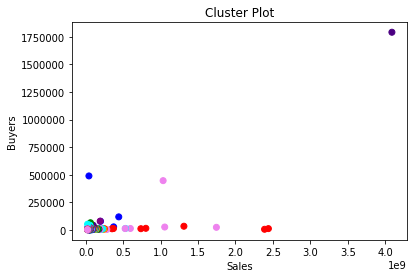

In [135]:
import matplotlib.pyplot as plt

# Define a color map for the labels
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'violet', 'indigo']

# Create a scatter plot of Sales vs. Buyers, colored by labels
plt.scatter(features['Sales'], features['Buyers'], c=features['labels'].apply(lambda x: colors[x]))

# Add axis labels and title
plt.xlabel('Sales')
plt.ylabel('Buyers')
plt.title('Cluster Plot')

# Show the plot
plt.show()


<h1> in conclusion, this model is kind of terrible </h1>